# Introduction

This notebook has been created to explore and analyse the data recorded by the Leap Motion, so that we can get a measure of quality. This is particulary important as tracking is not robust for this viewing angle and object interaction.    

Each row is a tracking event recorded by the leap motion. The structure follows the LEAP_TRACKING_EVENT struct as defined in the v4.0 docs (albeit with a few spelling mistakes e.g. roatation -> rotation).

See the documentation [here](https://developer.leapmotion.com/documentation/v4/group___structs.html#struct_l_e_a_p___t_r_a_c_k_i_n_g___e_v_e_n_t)


# A look at the data

In [32]:
import pandas as pd

leap_df = pd.read_csv('leap_sample.csv')
print("Number of columns", len(leap_df.keys()))

Number of columns 273


We could get an idea of the proportion of the task time the hands have been tracked for. 

(Total file size - size of header)/(size of a tracking event) # could be multiple hands

In [48]:
import datetime as dt 

dt.date

def get_tone_timestamps(path):
    '''
    Returns the system timestamp and leap timestamp as a dictionary by recording id. 

            Parameters:
                    path (str): The path to the patient folder
            Returns:
                    leap_timestamps_dict (datetime obj): A format that allows it to be easily converted to wall time
    '''

    tone_timestamps_path = glob.glob(path + r"\*_tone_timestamps.csv")[0]


    with open(tone_timestamps_path) as f:
        data = [x.split(",") for x in f.readlines()]

    tone_timestamps = {}

    for dat in data:
        # Leap timestamp is measured in microseconds 
        # System timestamp is the seconds since epoch 
        
        datetime_object  = dt.datetime.fromisoformat(dat[-1].replace("\n",""))
        epoch = dt.datetime.utcfromtimestamp(0)
        tone_timestamps[dat[0]] = (datetime_object - epoch).total_seconds()

    return tone_timestamps

ic(get_tone_timestamps(path))

ic| get_tone_timestamps(path): {'20210621-140445_visual': 1624255491.474192,
                                '20210621-140542_visual': 1624255547.976907,
                                '20210621-140627_visual': 1624255591.788991,
                                '20210621-140649_visual': 1624255614.868907,
                                '20210621-140714_visual': 1624255639.090815,
                                '20210621-140729_visual': 1624255655.907761,
                                '20210621-140801_memory': 1624255684.136282,
                                '20210621-140815_memory': 1624255699.004196,
                                '20210621-140829_memory': 1624255713.913464,
                                '20210621-140845_memory': 1624255731.357478,
                                '20210621-140900_memory': 1624255745.927139}


{'20210621-140445_visual': 1624255491.474192,
 '20210621-140542_visual': 1624255547.976907,
 '20210621-140627_visual': 1624255591.788991,
 '20210621-140649_visual': 1624255614.868907,
 '20210621-140714_visual': 1624255639.090815,
 '20210621-140729_visual': 1624255655.907761,
 '20210621-140801_memory': 1624255684.136282,
 '20210621-140815_memory': 1624255699.004196,
 '20210621-140829_memory': 1624255713.913464,
 '20210621-140845_memory': 1624255731.357478,
 '20210621-140900_memory': 1624255745.927139}

As described in the documentation, each tracking frame captures the position, orientation and velocity of structural points of a hand. This results in a large number of columns. Lets see what other information is available. 

In [97]:
hand = ["palm", "arm", "pinky", "ring", "index", "thumb", "middle"]

# Find columns where the strings in this list is in the strings of the column names.
columns = leap_df.keys()

part_list = []
for column in columns:
    for part in hand:
        if part in column:
            part_list.append(column)

other_columns = [x for x in columns if x not in part_list]

print(other_columns)

['frame_id', 'timestamp', 'tracking_frame_id', 'nHands', 'hand_id', 'hand_type', 'visible_time', 'pinch_distance', 'grab_angle', 'pinch_strength', 'grab_strength', 'framerate']


**frame_id** a unique integer given for a frame. In this recording two rows can share the same **frame_id** as the left and right hand can be captured at the same time. 

**visible_time** accounts for the total time that the compainion application has been running. This will accumulate over the lifetime of the reach and grasp software. 


We could look at the visible time of the hands with the largest group id. 

0. Group by hand type
1. Group by hand id
2. For each group, look at the entry with the longest visible time. The total of these values will be the total time each hand was recorded for. 

In [98]:
leap_copy = leap_df.copy(deep=True)
leap_copy['timestamp'] = (leap_copy['timestamp'] - leap_copy['timestamp'].min()) * (10 ** -6)

grouped_leap_df = leap_copy.groupby(by=['hand_type','hand_id'])

left = []
right = []

for name,group in grouped_leap_df:

   start_dur = (group['timestamp'].min(), group['timestamp'].max() - group['timestamp'].min())

   if 'left' in name:
      left.append(start_dur)
   else:
      right.append(start_dur)

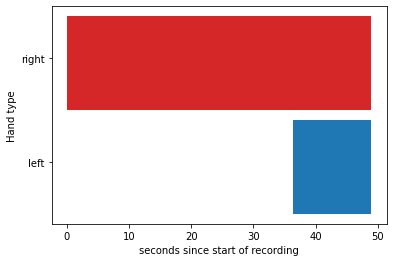

In [99]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.broken_barh(left, (10, 9), facecolors='tab:blue')
ax.broken_barh(right, (20, 9), facecolors='tab:red')

ax.set_xlabel('seconds since start of recording')
ax.set_ylabel('Hand type')
ax.set_yticks([15, 25])
ax.set_yticklabels(['left', 'right'])
ax.grid(False)

plt.show()

In [21]:
# Given a path to a patient recording
import os
import glob
from icecream import ic

ic.disable()

path = r"E:\Ruijin\20210621-132108_songshanying-20210622T114441Z-001\20210621-132108_songshanying"

ic(os.listdir(path))

some_list = ic(glob.glob(path + r"\*_leap.csv"))

recording_pairs = ic([(x, x.replace("_leap.csv","\\000\\")) for x in some_list])

out = ic(all([os.path.isdir(recording_pairs[i][1]) for i in range(len(recording_pairs))])) # Test to make sure all folders are available. 

ic.enable()



leap_timestamps_path = glob.glob(path + r"\*_leap_timestamps.csv")[0]

with open(leap_timestamps_path) as f:
    data = f.readlines()


data_dict = {}
leap_timestamps_dict = {}

for dat in data:
    entries = dat.split(',')


ic| float(entries[-1]): 1624255486.606989
ic| float(entries[-1]): 1624255543.097173
ic| float(entries[-1]): 1624255587.909441
ic| float(entries[-1]): 1624255611.708671
ic| float(entries[-1]): 1624255634.214251
ic| float(entries[-1]): 1624255650.71235
ic| float(entries[-1]): 1624255682.020105
ic| float(entries[-1]): 1624255696.0931
ic| float(entries[-1]): 1624255710.760017
ic| float(entries[-1]): 1624255725.719931
ic| float(entries[-1]): 1624255741.050695


In [50]:
def get_leap_timestamps(path):
    '''
    Returns the system timestamp and leap timestamp as a dictionary by recording id. 

            Parameters:
                    path (str): The path to the patient folder
            Returns:
                    leap_timestamps_dict (datetime obj): A format that allows it to be easily converted to wall time
    '''
    leap_timestamps_path = glob.glob(path + r"\*_leap_timestamps.csv")[0]


    with open(leap_timestamps_path) as f:
        data = [x.split(",") for x in f.readlines()]


    leap_timestamps = {}

    for dat in data:
        # Leap timestamp is measured in microseconds 
        # System timestamp is the seconds since epoch 
        leap_timestamps[dat[0]] = (float(dat[1]) * 10 ** -6, float(dat[2]))

        print((float(dat[1]) * 10 ** -6) - (float(dat[2])))

    return leap_timestamps

-1622187907.4290278
-1622187907.429034
-1622187907.429031
-1622187907.428916
-1622187907.429032
-1622187907.429031
-1622187907.4290318
-1622187907.429033
-1622187907.42903
-1622187907.429034
-1622187907.4290318


{'20210621-140445_visual': (2067579.177961, 1624255486.606989),
 '20210621-140542_visual': (2067635.668139, 1624255543.097173),
 '20210621-140627_visual': (2067680.4804099998, 1624255587.909441),
 '20210621-140649_visual': (2067704.2797549998, 1624255611.708671),
 '20210621-140714_visual': (2067726.785219, 1624255634.214251),
 '20210621-140729_visual': (2067743.283319, 1624255650.71235),
 '20210621-140801_memory': (2067774.5910729999, 1624255682.020105),
 '20210621-140815_memory': (2067788.664067, 1624255696.0931),
 '20210621-140829_memory': (2067803.330987, 1624255710.760017),
 '20210621-140845_memory': (2067818.2908969999, 1624255725.719931),
 '20210621-140900_memory': (2067833.621663, 1624255741.050695)}

In [34]:
import Leap as lp
from tqdm import tqdm



for name,group in grouped_leap_df:
    



for index, row in leap_df.iterrows():

    prev_tracking_frame = row['frame_id']

    frame_id = row['frame_id']
    timestamp = row['timestamp']
    tracking_frame_id = row['tracking_frame_id']
    nHands = row['nHands']
    framerate = row['framerate']
    hand = get_hand(row)

    if nHands == 1:
        tracking_events.append(LEAP_TRACKING_EVENT(frame_id, timestamp, tracking_frame_id, nHands, [hand],
                                                    framerate))
    else:
        if row['frame_id'] == prev_tracking_frame:
            # There has been another hand tracked
            tracking_events.append(LEAP_TRACKING_EVENT(frame_id, timestamp, tracking_frame_id, nHands,
                                                        [temp_hand, hand], framerate))
        else:
            temp_hand = hand

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 120.0, (500, 400))

count = 0

for event in tqdm(tracking_events):

    # # make a Figure and attach it to a canvas.
    # fig = Figure(figsize=(5, 4), dpi=100)
    # canvas = FigureCanvasAgg(fig)



    fig = plt.figure(figsize=(5,4), dpi=100)
    canvas = FigureCanvasAgg(fig)
    ax = fig.add_subplot(111, projection='3d')

    ax.set_xlim3d(0, -300)
    ax.set_ylim3d(0, 300)
    ax.set_zlim3d(0, 300)

    ax.view_init(180, 180)



    plt.axis('off')

    for hand in event.hands:
        plot_hand(hand, ax)

    # Retrieve a view on the renderer buffer
    canvas.draw()
    buf = canvas.buffer_rgba()
    # convert to a NumPy array
    X = np.asarray(buf)

    img = Image.fromarray(X.astype(np.uint8))
    opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    #print(opencvImage.shape)
    #cv2.imshow("hello", opencvImage)
    #cv2.waitKey(0)

    out.write(opencvImage)
    plt.close(fig)

IndentationError: expected an indented block (<ipython-input-34-86c7116fb5d1>, line 11)

In [160]:
import json 

def get_epochs(path):
    '''
    Returns the Pupil Epoch and System Epoch timestamps

            Parameters:
                    path (str): Path to recording directory
            Returns:
                    timestamps (tuple str): Timestamps read from the file
    '''

    f = open(path + "info.player.json")

    data = json.load(f)   # returns JSON object as a dictionary

    f.close()

    return (data['start_time_synced_s'],data['start_time_system_s'])

start_time_synced_s, start_time_system_s = ic(get_epochs(recording_pairs[0][1]))



import datetime

def convert_pupil_timestamp(input_timestamp, start_time_system, start_time_synched):
    '''
    Returns the converted Pupil Epoch timestamp to Unix Epoch

            Parameters:
                    input_timestamp (int): Time delta measured from Pupil Epoch
                    start_time_system (int): Unix Epoch at start time of the recording
                    start_time_synched (int): Pupil Epoch at start time of the recording

            Returns:
                    correlated_timestamp (datetime obj): A format that allows it to be easily converted to wall time
    '''
    offset = start_time_system - start_time_synched
    
    return datetime.datetime.fromtimestamp(input_timestamp + offset)

ic| get_epochs(recording_pairs[0][1]): (222903.665974, 1624255485.5019083)


In [163]:
# Each leap recording is paired with a pupil labs recording folder
import numpy as np

file_list = ic(os.listdir(recording_pairs[0][1])) # Files in the folder 

world_timestamps = np.load(recording_pairs[0][1] + "world_timestamps.npy") # an array of pupil timestamps, with each index corresponding to a frame in the video


world_timestamps = np.array([convert_pupil_timestamp(x,start_time_system_s, start_time_synced_s) for x in world_timestamps])

ic(world_timestamps) # Array of timestamps 

ic| os.listdir(recording_pairs[0][1]): ['blinks.pldata',
                                        'blinks_timestamps.npy',
                                        'exports',
                                        'eye0.intrinsics',
                                        'eye0.mp4',
                                        'eye0_lookup.npy',
                                        'eye0_timestamps.npy',
                                        'eye1.intrinsics',
                                        'eye1.mp4',
                                        'eye1_lookup.npy',
                                        'eye1_timestamps.npy',
                                        'fixations.pldata',
                                        'fixations_timestamps.npy',
                                        'gaze.pldata',
                                        'gaze_timestamps.npy',
                                        'info.player.json',
                                        'notify.pldata'

array([datetime.datetime(2021, 6, 21, 7, 4, 45, 556611),
       datetime.datetime(2021, 6, 21, 7, 4, 45, 593905),
       datetime.datetime(2021, 6, 21, 7, 4, 45, 603755), ...,
       datetime.datetime(2021, 6, 21, 7, 5, 36, 941069),
       datetime.datetime(2021, 6, 21, 7, 5, 36, 956223),
       datetime.datetime(2021, 6, 21, 7, 5, 36, 976315)], dtype=object)

In [ ]:
# Given the array of timestamps sample? 


